# Linear Regression

## Load the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

## Load the Data - `NewspaperData.csv`

In [2]:
# load the dataset NewspaperData.csv
df = pd.read_csv('Data Sets/NewspaperData.csv')

In [3]:
# head of the dataset
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


## Check Datatypes of the Features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


## Check Correlation between numeric independent features

In [5]:
# correlation matrix
corel = df.corr().round(2)
corel

,daily,sunday
daily,1.00,0.96
sunday,0.96,1.00


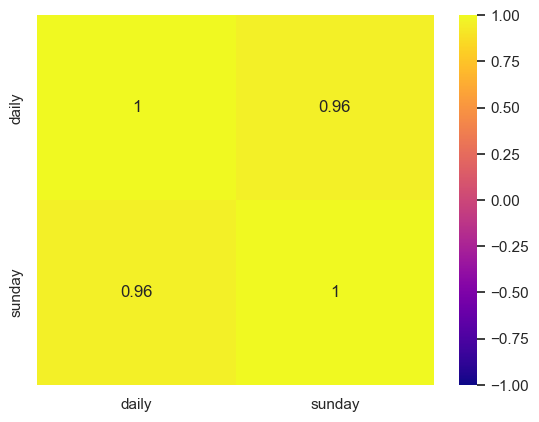

In [7]:
# heatmap
sns.heatmap(data=corel,
           annot=True,
           cmap='plasma',
           vmin=-1,
           vmax=1);


## Univariate Analysis - Numeric Features

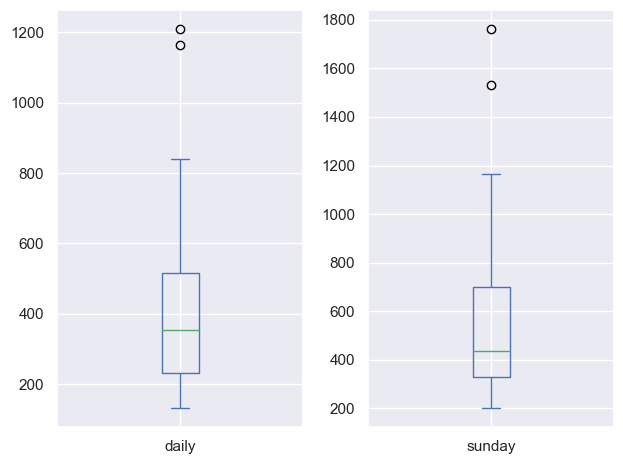

In [8]:
# plot the boxplot and density plot of the numeric features `daily` and `sunday` as 2x2 subplots
df.plot(kind='box',subplots=True)
plt.tight_layout();


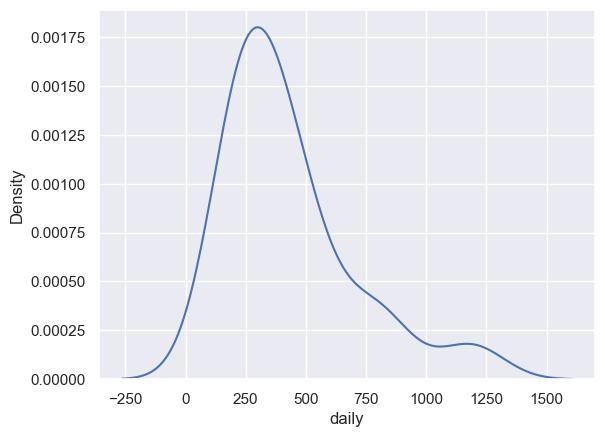

In [9]:
sns.kdeplot(data=df, x='daily');

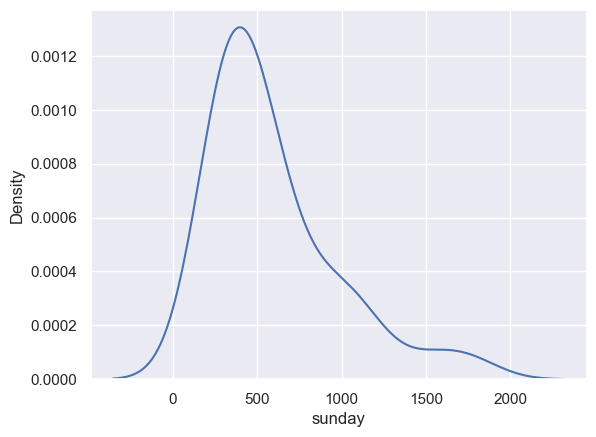

In [10]:
sns.kdeplot(data=df, x='sunday');

## Outlier Treatment

In [11]:
q3 = df['daily'].quantile(0.75)
q1 = df['daily'].quantile(0.25)
q3,q1

(516.6165, 233.0215)

In [12]:
IQR = q3 - q1
UB = q3 + (1.5*IQR)
LB = q1 - (1.5*IQR)
UB,LB

(942.0089999999999, -192.37099999999992)

In [13]:
df['daily'] = np.where(df['daily'] > UB,UB,df['daily'])
# df['daily'] = np.where(df['daily'] < LB,LB,df['daily'])

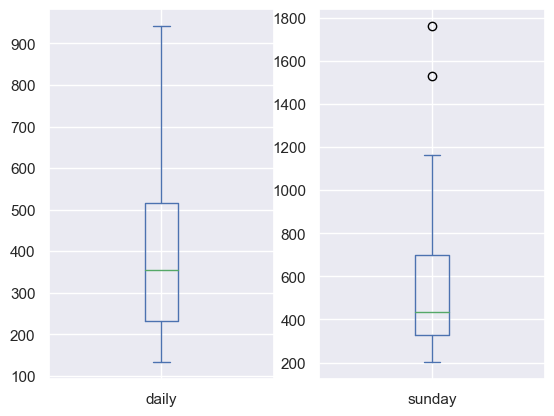

In [14]:
df.plot(kind='box',subplots= True);

## Missing Value Check

In [15]:
df.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

## Fit a Simple Linear Regression model using statsmodels library using the formula api

In [16]:
from statsmodels.formula.api import ols

In [17]:
# create a formula string & fit the model and print the model summary
formula = 'sunday ~ daily'
model = ols(formula=formula,data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 sunday   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     219.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.24e-16
Time:                        07:52:49   Log-Likelihood:                -214.36
No. Observations:                  34   AIC:                             432.7
Df Residuals:                      32   BIC:                             435.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.4200     48.791     -0.869      0.3

## Visualize the Simple Linear Regression Model

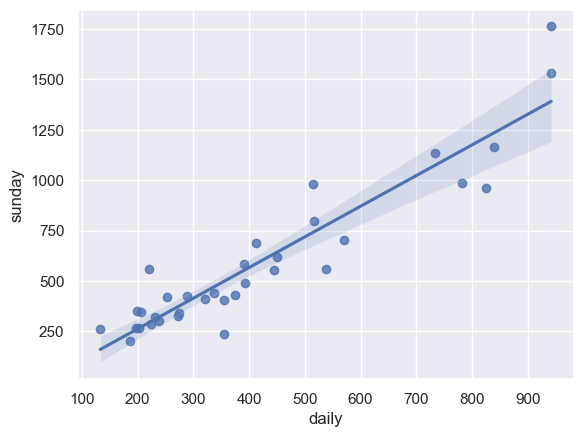

In [18]:
# regplot
sns.regplot(data=df, x='daily',y='sunday');

## Evaluate Model Performance using Regression Evaluation Metrics

In [19]:
# R-square
from sklearn.metrics import r2_score

In [ ]:
# Adjusted R-square


In [ ]:
# print RMSE using the mse_resid attribute of the trained model


## Predict for a new data point

In [20]:
# create a dataframe with values 200,300 for `daily` feature. call it `new_data`
new_data = pd.DataFrame({'daily': [200, 300]})

In [21]:
# predict the `sunday` values for `new_data`
model.predict(new_data)

0    261.794711
1    413.902080
dtype: float64

## Linear Regression using sklearn library

In [22]:
# import linear regression model from sklearn
from sklearn.linear_model import LinearRegression

In [23]:
# create a model object & fit the model
lr = LinearRegression()
lr.fit(pd.DataFrame(df['daily']),df['sunday'])

LinearRegression()

In [24]:
# get the coefficients
lr.coef_

array([1.52107369])

In [25]:
# get the intercept
lr.intercept_

-42.42002780303551

In [26]:
# predict using the model on the new data
lr.predict(new_data)

array([261.79471098, 413.90208037])

In [27]:
lr.score(pd.DataFrame(df['daily']),df['sunday'])

0.8725378964118639

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
pred = lr.predict(pd.DataFrame(df['daily']))
pred

array([ 553.76784867,  743.94617155,  498.51636781,  320.43970725,
        775.58298331, 1073.70582194,  260.0180969 ,  341.83969305,
        271.23145218,  309.21722553,  641.6904714 ,  396.51772912,
        240.09811581, 1390.44508152,  633.82043611,  585.58718927,
        371.73791757, 1146.7493018 , 1390.44508152, 1213.2445594 ,
        297.91716906,  497.32232496,  741.7284461 ,  292.92348412,
        471.20396857,  257.41401874,  160.2463101 ,  526.47522338,
        374.11687683,  825.14564855,  552.75481359,  264.62390805,
        446.79682007, 1233.61173616])

In [32]:
rmse_lr = mean_squared_error(df['sunday'],pred, squared=False)
rmse_lr

132.39710660308728